<a href="https://colab.research.google.com/github/Zarathos01/Machine-learning-is-fun/blob/main/Bundle%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing Data

In [ ]:
!unzip drive/MyDrive/Colab\ Notebooks/KPIs_Data.zip

Archive:  drive/MyDrive/Colab Notebooks/KPIs_Data.zip
replace KPIs_Data.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: KPIs_Data.txt           


# EDA and Data Preprocessing

In [ ]:
df = pd.read_csv('KPIs_Data.txt', delimiter='\t')
df

,Subscription_Id,og_usage_m3,og_usage_m2,og_usage_m1,data_usage_m3,data_usage_m2,data_usage_m1,rev_m3,rev_m2,rev_m1,Rate_Plan_Desc,Most_Used_Region,aon,post_migration_plan
0,127122557,3422,3862,3679,4578,8225,6200,61.31,318.42,547.56,BundleChild Voice,G.Cairo,2942,Bundle 2000
1,157038198,1257,755,953,33,14,10,9.61,10.44,11.27,BundleChild Voice,?,112,Bundle 2000
2,192116383,612,1153,617,4514,1081,5468,739.55,863.5,2280.21,Bundle1150,G.Cairo,?,Bundle 2000
3,116872408,3882,1796,2270,42645,20197,23004,378.83,1010.38,1552.94,Bundle230,G.Cairo,3225,Bundle 2000
4,86447560,347,380,317,1434,1841,960,26.95,238.17,634.22,Bundle230,G.Cairo,3592,Bundle 2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,180264709,781,1225,1544,2286,8259,4454,0.83,1.66,2.49,BundleChild Voice,G.Cairo,1029,?
69996,178092376,14,12,1,263,0,0,0.83,1.66,2.49,BundleChild Voice,G.Cairo,1132,?
69997,194038849,792,1054,373,32115,11292,1297,659.63,1099.15,1579.9,Bundle230,Upper,337,?
69998,183416262,0,0,0,0,19,0,0.83,1.66,2.49,BundleChild Voice,G.Cairo,860,?


In [ ]:
df.head(10)

,Subscription_Id,og_usage_m3,og_usage_m2,og_usage_m1,data_usage_m3,data_usage_m2,data_usage_m1,rev_m3,rev_m2,rev_m1,Rate_Plan_Desc,Most_Used_Region,aon,post_migration_plan
0,127122557,3422,3862,3679,4578,8225,6200,61.31,318.42,547.56,BundleChild Voice,G.Cairo,2942,Bundle 2000
1,157038198,1257,755,953,33,14,10,9.61,10.44,11.27,BundleChild Voice,?,112,Bundle 2000
2,192116383,612,1153,617,4514,1081,5468,739.55,863.5,2280.21,Bundle1150,G.Cairo,?,Bundle 2000
3,116872408,3882,1796,2270,42645,20197,23004,378.83,1010.38,1552.94,Bundle230,G.Cairo,3225,Bundle 2000
4,86447560,347,380,317,1434,1841,960,26.95,238.17,634.22,Bundle230,G.Cairo,3592,Bundle 2000
5,192657707,1272,1216,1162,15693,14077,11167,286.2,607.03,1042.92,BundleChild Voice,G.Cairo,501,Bundle 2000
6,112197129,99,102,138,3694,1786,4988,31.07,54.58,55.41,BundleChild Voice,G.Cairo,3441,Bundle 2000
7,145304352,315,365,168,13099,5285,2628,0.83,1.66,2.49,BundleChild Voice,G.Cairo,?,Bundle 2000
8,193675774,?,?,?,?,?,?,308.63,617.26,975.14,Bundle230,?,388,Bundle 2000
9,165652221,0,0,0,0,0,0,254.92,563.55,921.43,Bundle230,?,1951,Bundle 2000


In [ ]:
df.describe()

,Subscription_Id
count,7.000000e+04
mean,1.410090e+08
std,6.006165e+07
min,8.491000e+03
25%,1.014815e+08
50%,1.668224e+08
75%,1.879417e+08
max,2.007796e+08


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Subscription_Id      70000 non-null  int64 
 1   og_usage_m3          70000 non-null  object
 2   og_usage_m2          70000 non-null  object
 3   og_usage_m1          70000 non-null  object
 4   data_usage_m3        70000 non-null  object
 5   data_usage_m2        70000 non-null  object
 6   data_usage_m1        70000 non-null  object
 7   rev_m3               70000 non-null  object
 8   rev_m2               70000 non-null  object
 9   rev_m1               70000 non-null  object
 10  Rate_Plan_Desc       70000 non-null  object
 11  Most_Used_Region     70000 non-null  object
 12  aon                  70000 non-null  object
 13  post_migration_plan  70000 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.5+ MB


In [ ]:
df.isna().sum()

,0
Subscription_Id,0
og_usage_m3,0
og_usage_m2,0
og_usage_m1,0
data_usage_m3,0
data_usage_m2,0
data_usage_m1,0
rev_m3,0
rev_m2,0
rev_m1,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.columns:
  print(i, df[i].unique())

Subscription_Id [127122557 157038198 192116383 ... 194038849 183416262 176399234]
og_usage_m3 ['3422' '1257' '612' ... '4812' '4097' '5366']
og_usage_m2 ['3862' '755' '1153' ... '3321' '3622' '4322']
og_usage_m1 ['3679' '953' '617' ... '3843' '3646' '4104']
data_usage_m3 ['4578' '33' '4514' ... '11883' '7302' '17711']
data_usage_m2 ['8225' '14' '1081' ... '28288' '21072' '25278']
data_usage_m1 ['6200' '10' '5468' ... '6334' '22990' '21946']
rev_m3 ['61.31' '9.61' '739.55' ... '1211.7' '1.64' '659.63']
rev_m2 ['318.42' '10.44' '863.5' ... '17.53' '1410.14' '1099.15']
rev_m1 ['547.56' '11.27' '2280.21' ... '26.67' '1776.02' '1579.9']
Rate_Plan_Desc ['BundleChild Voice' 'Bundle1150' 'Bundle230' 'Bundle450' 'Bundle690'
 'Bundle2300']
Most_Used_Region ['G.Cairo' '?' 'Upper' 'Delta' 'G.Alex' 'Canal']
aon ['2942' '112' '?' ... '5259' '2758' '5322']
post_migration_plan ['Bundle 2000' '?']


In [ ]:
df.drop('Subscription_Id', axis=1, inplace=True)

In [ ]:
df.shape

(70000, 13)

In [ ]:
numerical_cols = ['og_usage_m3','og_usage_m2','og_usage_m1','data_usage_m3','data_usage_m2','data_usage_m1','rev_m3','rev_m2','rev_m1','aon']
df[numerical_cols] = pd.to_numeric(df[numerical_cols].stack(), errors='coerce').unstack()
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   og_usage_m3          66290 non-null  float64
 1   og_usage_m2          66290 non-null  float64
 2   og_usage_m1          66290 non-null  float64
 3   data_usage_m3        66290 non-null  float64
 4   data_usage_m2        66290 non-null  float64
 5   data_usage_m1        66290 non-null  float64
 6   rev_m3               68704 non-null  float64
 7   rev_m2               69517 non-null  float64
 8   rev_m1               69557 non-null  float64
 9   Rate_Plan_Desc       70000 non-null  object 
 10  Most_Used_Region     70000 non-null  object 
 11  aon                  69521 non-null  float64
 12  post_migration_plan  70000 non-null  object 
dtypes: float64(10), object(3)
memory usage: 6.9+ MB


In [ ]:
df = df.replace('?', np.nan)
df.head(10)

,og_usage_m3,og_usage_m2,og_usage_m1,data_usage_m3,data_usage_m2,data_usage_m1,rev_m3,rev_m2,rev_m1,Rate_Plan_Desc,Most_Used_Region,aon,post_migration_plan
0,3422.0,3862.0,3679.0,4578.0,8225.0,6200.0,61.31,318.42,547.56,BundleChild Voice,G.Cairo,2942.0,Bundle 2000
1,1257.0,755.0,953.0,33.0,14.0,10.0,9.61,10.44,11.27,BundleChild Voice,NaN,112.0,Bundle 2000
2,612.0,1153.0,617.0,4514.0,1081.0,5468.0,739.55,863.50,2280.21,Bundle1150,G.Cairo,NaN,Bundle 2000
3,3882.0,1796.0,2270.0,42645.0,20197.0,23004.0,378.83,1010.38,1552.94,Bundle230,G.Cairo,3225.0,Bundle 2000
4,347.0,380.0,317.0,1434.0,1841.0,960.0,26.95,238.17,634.22,Bundle230,G.Cairo,3592.0,Bundle 2000
5,1272.0,1216.0,1162.0,15693.0,14077.0,11167.0,286.20,607.03,1042.92,BundleChild Voice,G.Cairo,501.0,Bundle 2000
6,99.0,102.0,138.0,3694.0,1786.0,4988.0,31.07,54.58,55.41,BundleChild Voice,G.Cairo,3441.0,Bundle 2000
7,315.0,365.0,168.0,13099.0,5285.0,2628.0,0.83,1.66,2.49,BundleChild Voice,G.Cairo,NaN,Bundle 2000
8,NaN,NaN,NaN,NaN,NaN,NaN,308.63,617.26,975.14,Bundle230,NaN,388.0,Bundle 2000
9,0.0,0.0,0.0,0.0,0.0,0.0,254.92,563.55,921.43,Bundle230,NaN,1951.0,Bundle 2000


In [ ]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df['Most_Used_Region'] = df['Most_Used_Region'].fillna(df['Most_Used_Region'].mode()[0])
df.head(10)

,og_usage_m3,og_usage_m2,og_usage_m1,data_usage_m3,data_usage_m2,data_usage_m1,rev_m3,rev_m2,rev_m1,Rate_Plan_Desc,Most_Used_Region,aon,post_migration_plan
0,3422.0,3862.0,3679.0,4578.0,8225.0,6200.0,61.31,318.42,547.56,BundleChild Voice,G.Cairo,2942.0,Bundle 2000
1,1257.0,755.0,953.0,33.0,14.0,10.0,9.61,10.44,11.27,BundleChild Voice,G.Cairo,112.0,Bundle 2000
2,612.0,1153.0,617.0,4514.0,1081.0,5468.0,739.55,863.50,2280.21,Bundle1150,G.Cairo,1680.0,Bundle 2000
3,3882.0,1796.0,2270.0,42645.0,20197.0,23004.0,378.83,1010.38,1552.94,Bundle230,G.Cairo,3225.0,Bundle 2000
4,347.0,380.0,317.0,1434.0,1841.0,960.0,26.95,238.17,634.22,Bundle230,G.Cairo,3592.0,Bundle 2000
5,1272.0,1216.0,1162.0,15693.0,14077.0,11167.0,286.20,607.03,1042.92,BundleChild Voice,G.Cairo,501.0,Bundle 2000
6,99.0,102.0,138.0,3694.0,1786.0,4988.0,31.07,54.58,55.41,BundleChild Voice,G.Cairo,3441.0,Bundle 2000
7,315.0,365.0,168.0,13099.0,5285.0,2628.0,0.83,1.66,2.49,BundleChild Voice,G.Cairo,1680.0,Bundle 2000
8,669.0,693.0,649.0,8081.0,8082.5,7463.5,308.63,617.26,975.14,Bundle230,G.Cairo,388.0,Bundle 2000
9,0.0,0.0,0.0,0.0,0.0,0.0,254.92,563.55,921.43,Bundle230,G.Cairo,1951.0,Bundle 2000


In [ ]:
df['post_migration_plan'] = df['post_migration_plan'].replace({'Bundle 2000':1, np.nan:0})
df

<ipython-input-50-9524e2f20738>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['post_migration_plan'] = df['post_migration_plan'].replace({'Bundle 2000':1, np.nan:0})


,og_usage_m3,og_usage_m2,og_usage_m1,data_usage_m3,data_usage_m2,data_usage_m1,rev_m3,rev_m2,rev_m1,Rate_Plan_Desc,Most_Used_Region,aon,post_migration_plan
0,3422.0,3862.0,3679.0,4578.0,8225.0,6200.0,61.31,318.42,547.56,BundleChild Voice,G.Cairo,2942.0,1.0
1,1257.0,755.0,953.0,33.0,14.0,10.0,9.61,10.44,11.27,BundleChild Voice,G.Cairo,112.0,1.0
2,612.0,1153.0,617.0,4514.0,1081.0,5468.0,739.55,863.50,2280.21,Bundle1150,G.Cairo,1680.0,1.0
3,3882.0,1796.0,2270.0,42645.0,20197.0,23004.0,378.83,1010.38,1552.94,Bundle230,G.Cairo,3225.0,1.0
4,347.0,380.0,317.0,1434.0,1841.0,960.0,26.95,238.17,634.22,Bundle230,G.Cairo,3592.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,781.0,1225.0,1544.0,2286.0,8259.0,4454.0,0.83,1.66,2.49,BundleChild Voice,G.Cairo,1029.0,0.0
69996,14.0,12.0,1.0,263.0,0.0,0.0,0.83,1.66,2.49,BundleChild Voice,G.Cairo,1132.0,0.0
69997,792.0,1054.0,373.0,32115.0,11292.0,1297.0,659.63,1099.15,1579.90,Bundle230,Upper,337.0,0.0
69998,0.0,0.0,0.0,0.0,19.0,0.0,0.83,1.66,2.49,BundleChild Voice,G.Cairo,860.0,0.0


# Encoding Categorical features

In [ ]:
df = pd.get_dummies(df, columns=['Rate_Plan_Desc','Most_Used_Region'])
df

,og_usage_m3,og_usage_m2,og_usage_m1,data_usage_m3,data_usage_m2,data_usage_m1,rev_m3,rev_m2,rev_m1,aon,...,Rate_Plan_Desc_Bundle230,Rate_Plan_Desc_Bundle2300,Rate_Plan_Desc_Bundle450,Rate_Plan_Desc_Bundle690,Rate_Plan_Desc_BundleChild Voice,Most_Used_Region_Canal,Most_Used_Region_Delta,Most_Used_Region_G.Alex,Most_Used_Region_G.Cairo,Most_Used_Region_Upper
0,3422.0,3862.0,3679.0,4578.0,8225.0,6200.0,61.31,318.42,547.56,2942.0,...,False,False,False,False,True,False,False,False,True,False
1,1257.0,755.0,953.0,33.0,14.0,10.0,9.61,10.44,11.27,112.0,...,False,False,False,False,True,False,False,False,True,False
2,612.0,1153.0,617.0,4514.0,1081.0,5468.0,739.55,863.50,2280.21,1680.0,...,False,False,False,False,False,False,False,False,True,False
3,3882.0,1796.0,2270.0,42645.0,20197.0,23004.0,378.83,1010.38,1552.94,3225.0,...,True,False,False,False,False,False,False,False,True,False
4,347.0,380.0,317.0,1434.0,1841.0,960.0,26.95,238.17,634.22,3592.0,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,781.0,1225.0,1544.0,2286.0,8259.0,4454.0,0.83,1.66,2.49,1029.0,...,False,False,False,False,True,False,False,False,True,False
69996,14.0,12.0,1.0,263.0,0.0,0.0,0.83,1.66,2.49,1132.0,...,False,False,False,False,True,False,False,False,True,False
69997,792.0,1054.0,373.0,32115.0,11292.0,1297.0,659.63,1099.15,1579.90,337.0,...,True,False,False,False,False,False,False,False,False,True
69998,0.0,0.0,0.0,0.0,19.0,0.0,0.83,1.66,2.49,860.0,...,False,False,False,False,True,False,False,False,True,False


# OverSampling Target

In [ ]:
df['post_migration_plan'].value_counts()

,count
post_migration_plan,
0.0,69296
1.0,704


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = df.drop('post_migration_plan', axis=1)
y = df['post_migration_plan']
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='post_migration_plan')], axis=1)

In [ ]:
y_resampled.value_counts()

,count
post_migration_plan,
1.0,69296
0.0,69296


# Sum of Related features

In [ ]:
df['total_og'] = df['og_usage_m3'] + df['og_usage_m2'] + df['og_usage_m1']
df['total_data'] = df['data_usage_m3'] + df['data_usage_m2'] + df['data_usage_m1']
df['total_rev'] = df['rev_m3'] + df['rev_m2'] + df['rev_m1']
num_cols = ['total_og','total_data','total_rev','aon']

In [ ]:
df.drop(['og_usage_m3','og_usage_m2','og_usage_m1','data_usage_m3','data_usage_m2','data_usage_m1','rev_m3','rev_m2','rev_m1'], axis=1, inplace=True)

# Data Visualization

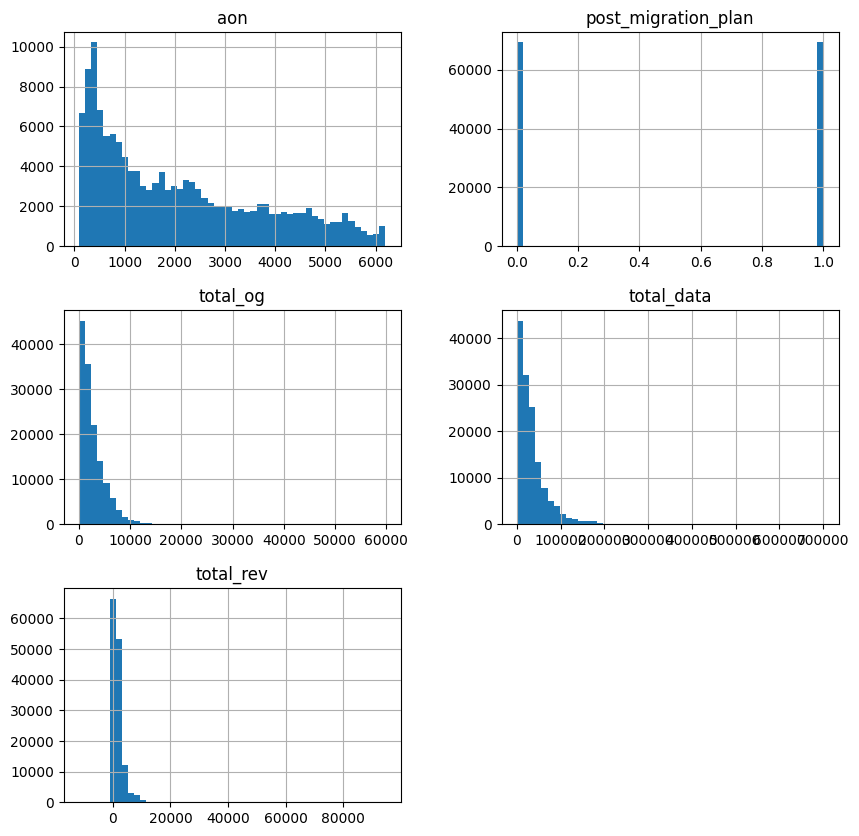

In [ ]:
df.hist(figsize=(10,10), bins = 50)
plt.show()

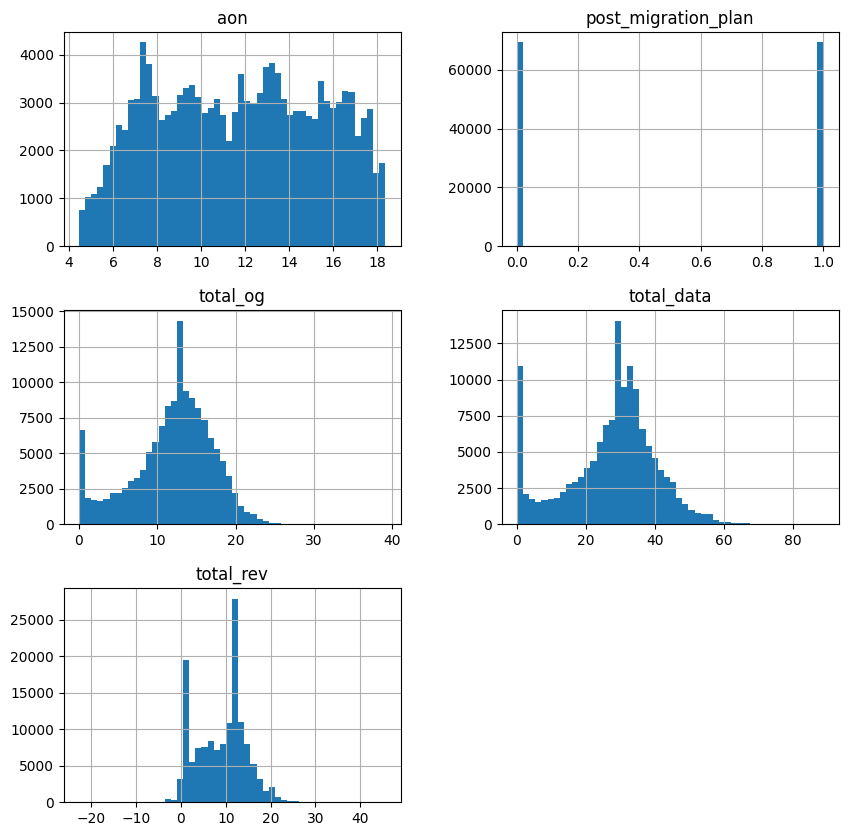

In [ ]:
#Cubic root transformation
for i in df[num_cols]:
  df[i] = np.sign(df[i]) * np.abs(df[i]) ** (1/3)
df.hist(figsize=(10,10), bins = 50)
plt.show()

# Detect Outliers using Box plot

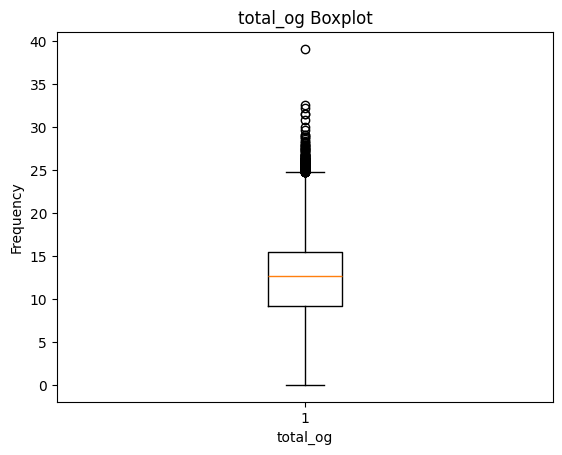

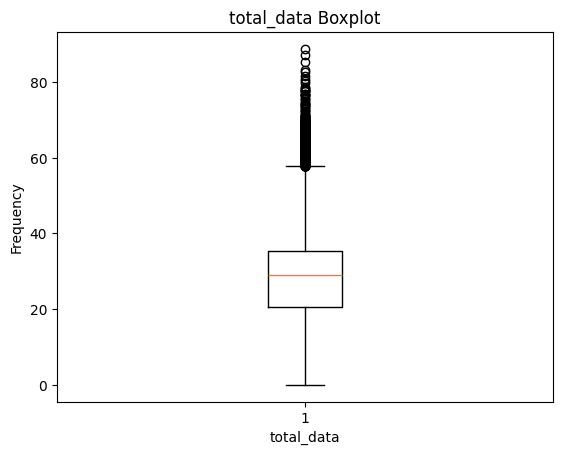

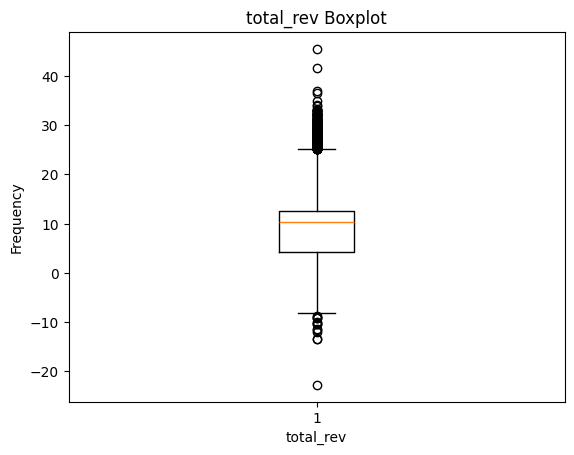

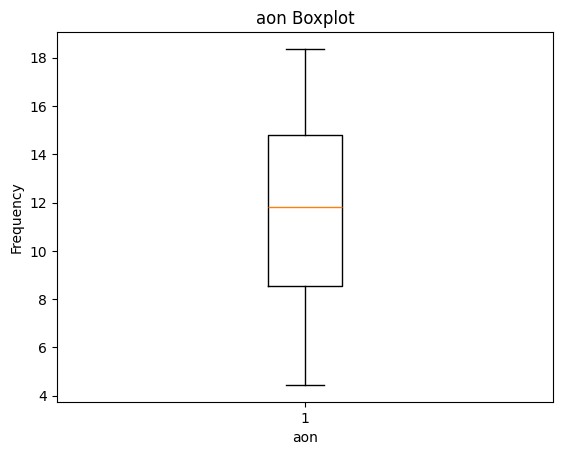

In [ ]:
for i in df[num_cols]:
  plt.boxplot(df[i])
  print("\n")
  plt.title(i + ' Boxplot')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()


# Remove Outliers

In [ ]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


df = remove_outliers_iqr(df, num_cols)

# Correlation Heatmap

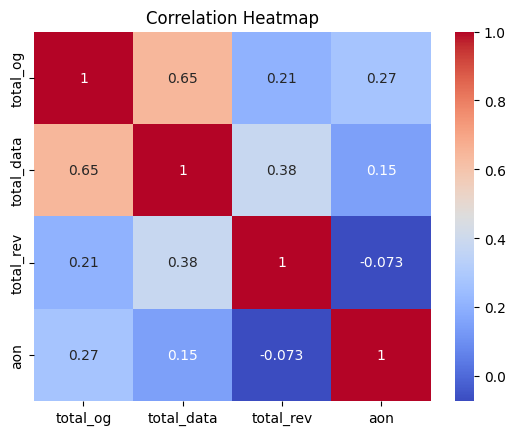

In [ ]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Logistic Regression

In [ ]:
X = X_resampled
y = y_resampled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='l2', C=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8732999025938887


# Confusion Matrix

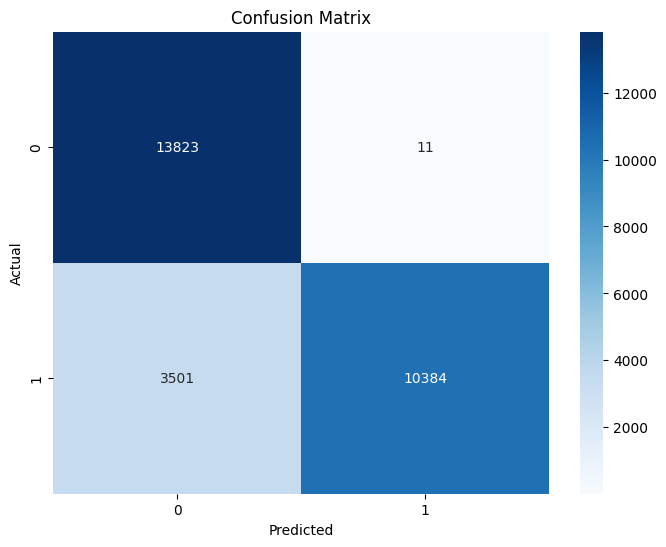

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     13834
         1.0       1.00      0.75      0.86     13885

    accuracy                           0.87     27719
   macro avg       0.90      0.87      0.87     27719
weighted avg       0.90      0.87      0.87     27719



# Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9763339225801797


# Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.992748656156427


# K-NN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9667376167971428
